# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain:
Banking

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Attribute Information:
 ID : Customer ID <br>
 Age : Customer's age in completed years <br>
 Experience : #years of professional experience <br>
 Income : Annual income of the customer (\\$000) <br>
 ZIP Code : Home Address ZIP code. <br>
 Family : Family size of the customer <br>
 CCAvg : Avg. spending on credit cards per month (\\$000) <br>
 Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
 Mortgage : Value of house mortgage if any. (\\$000) <br>
 Personal Loan : Did this customer accept the personal loan offered in the last campaign? <br>
 Securities Account : Does the customer have a securities account with the bank? <br>
 CD Account : Does the customer have a certificate of deposit (CD) account with the bank? <br>
 Online : Does the customer use internet banking facilities? <br>
 Credit card : Does the customer use a credit card issued by UniversalBank? <br>

# Learning Outcomes:
 Exploratory Data Analysis <br>
 Preparing the data to train a model <br>
 Training and making predictions using a classification model <br>
 Model evaluation <br>

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and tasks:

# 1. Read the column description and ensure you understand each attribute well

Gone through above mentioned details about attribute and understood about them.

# 2. Study the data distribution in each attribute, share your findings (15 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Above datatype information tells that there are no data with NaN or '?'

In [5]:
# Presence of NaN can also be verified as below
df.isna().values.any()

False

In [6]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Feature: ID

Observation: By looking at above result, its Uniformly distributed with unique value for each row. However this is not much useful in prediction. Will not consider this feature for building the model.

In [7]:
# Function for creating histogram and box-plot side by side for continuous variables
# Histogram plot is to help in understanding the distribution of the feature
# Box-plot is to see the data spread across quantiles and also to identify outliers if any
def feature_plot(feature):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
    sns.distplot(df[feature],ax=ax[0])
    sns.boxplot(y=df[feature],ax=ax[1])

#### Feature: Age

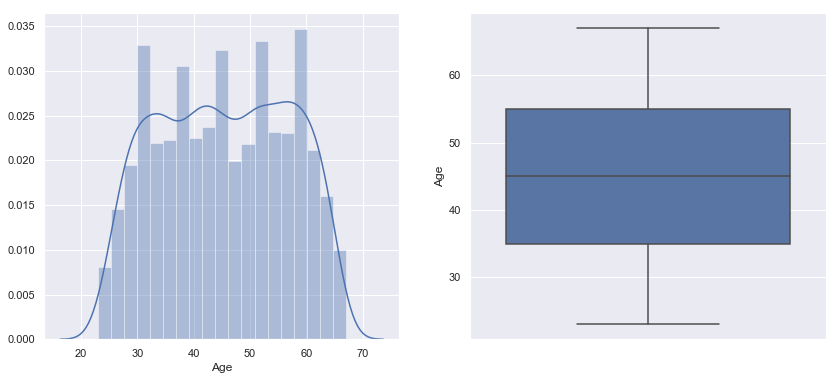

In [8]:
feature_plot(feature='Age')

Observation: Data is almost uniformly distributed between age 30 & 60. No outliers.

#### Feature: Experience

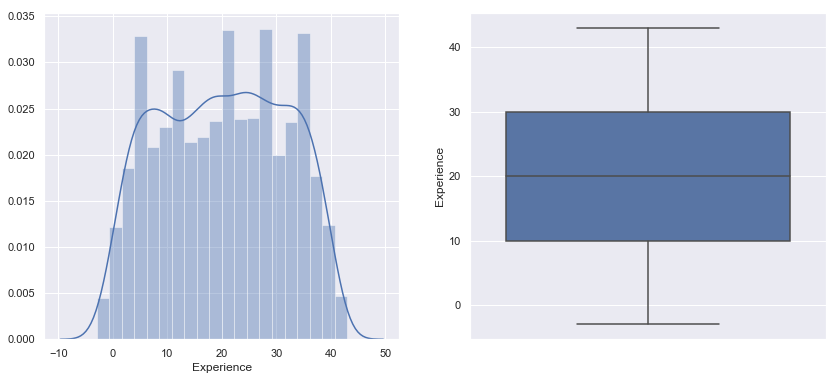

In [9]:
feature_plot(feature='Experience')

Observation: Seems there is an incorrect data(typo) with minus.Other than that, data looks uniformly distributed. No outliers.


#### Feature: Income

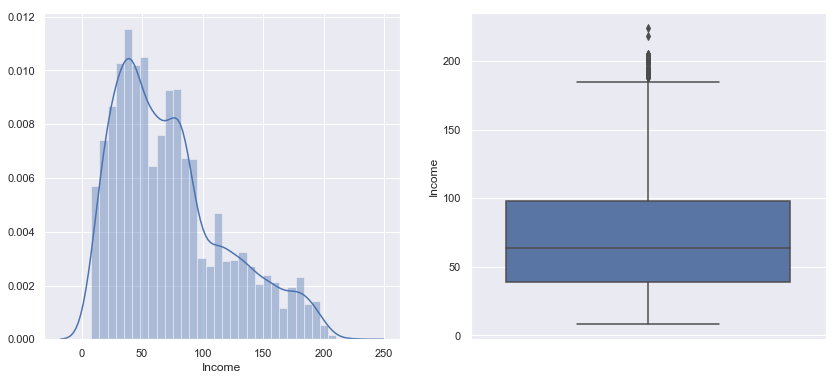

In [10]:
feature_plot(feature='Income')

Observation: Distribution is Right Skewed(Mean > Median[50%]). Many outliers in Higher Income side.

#### Feature: ZIP Code

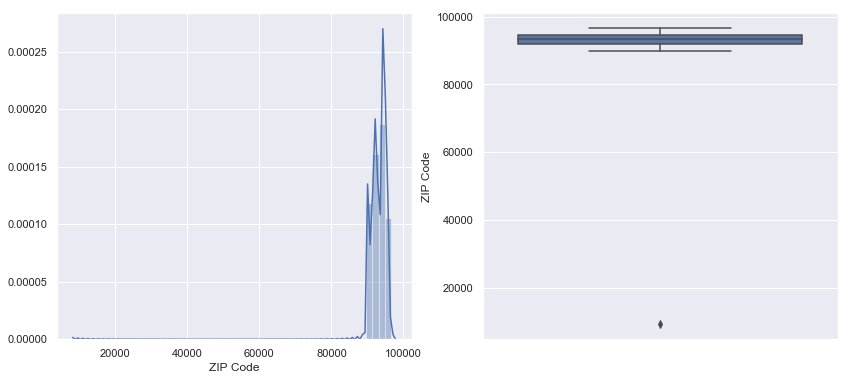

In [11]:
feature_plot(feature='ZIP Code')

Observation: Ideally ZIP codes should be of same no. of digits in a country. Seems there is an incorrect data as minimum value is of one digit less than others.

#### Feature: Family

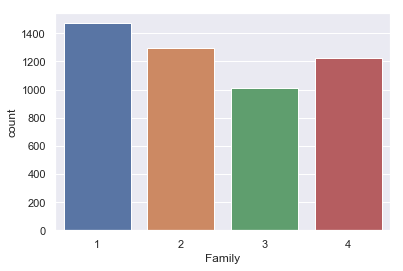

In [12]:
sns.countplot(x=df['Family'])

Observation: A bit Right SKewed(Mean > Median[50%]). Count got reduced as no. of family people increases until 3 and then it increased at no. of family people of 4.

#### Feature: CCAvg

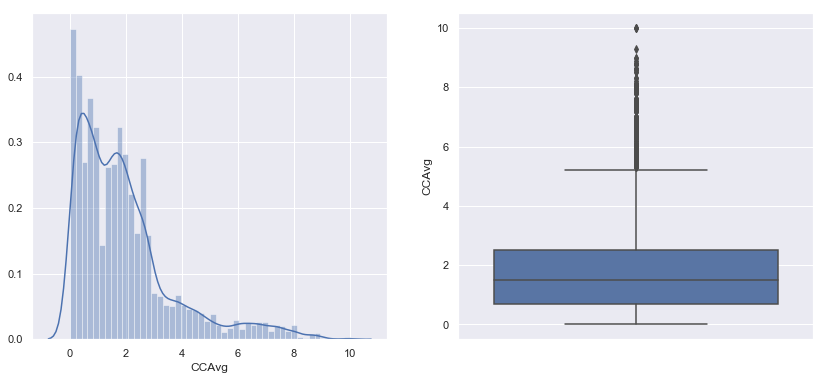

In [13]:
feature_plot(feature='CCAvg')

Observation: Right Skewed(Mean > Median[50%]). Many Outliers with High CCAvg.

#### Feature: Education

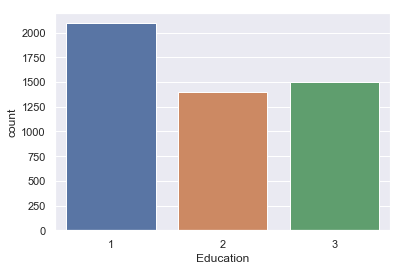

In [14]:
sns.countplot(df['Education'])

Observation: A bit left skewed. Most of the people are Undergraduates when compared to other Categories.

#### Feature: Mortgage

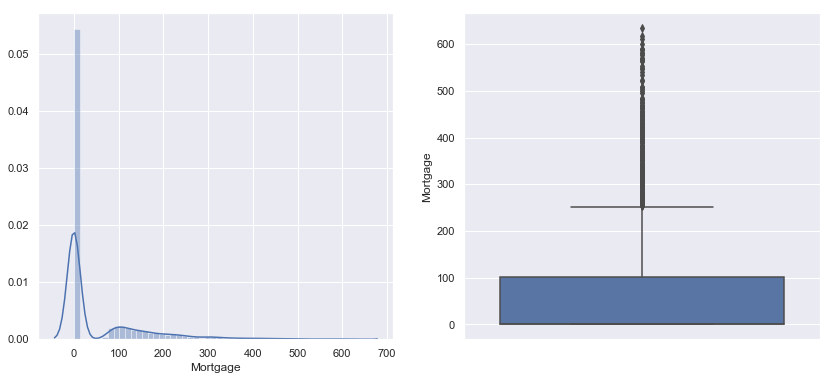

In [15]:
feature_plot(feature='Mortgage')

Observation:  Most of the people dont have mortgage.Completely Right skewed. Many outliers with high Mortgage.

#### Feature: Securities Account

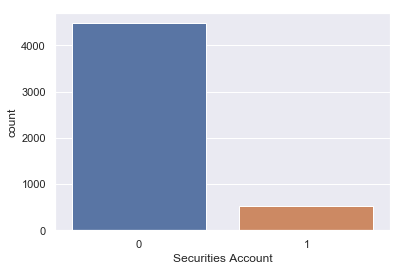

In [16]:
sns.countplot(df['Securities Account'])

Observation: More than 75% of the people didnt have Securities Account.

#### Feature: CD Account

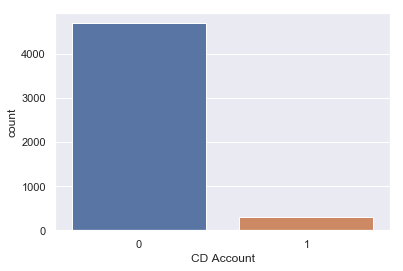

In [17]:
sns.countplot(df['CD Account'])

Observation: More than 75% of the people didnt have CD Account.

#### Feature: Online

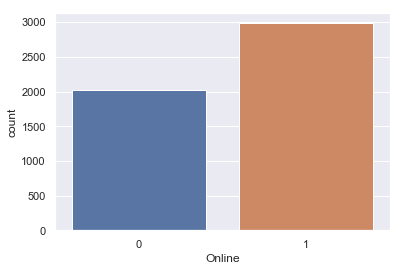

In [18]:
sns.countplot(df['Online'])

Observation: Most[ > 50%] of the people uses Internet banking facilities.

#### Feature: CreditCard

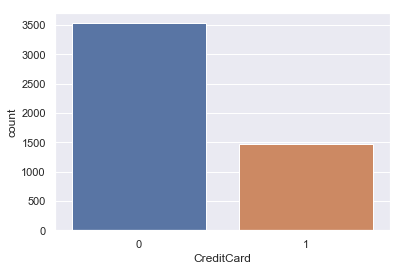

In [19]:
sns.countplot(df['CreditCard'])

Observation: Most of the people doesnt use Credit card issued by the bank.

# 3. Get the target column distribution. Your comments (5 marks)

#### Target Feature: Personal Loan

In [20]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

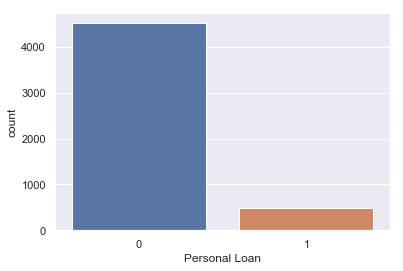

In [21]:
sns.countplot(df['Personal Loan'])

Observation: More than 75% of the people didnt take Personal Loan.

# Multivariate Analysis (Mostly for Target variable vs Independent Features)

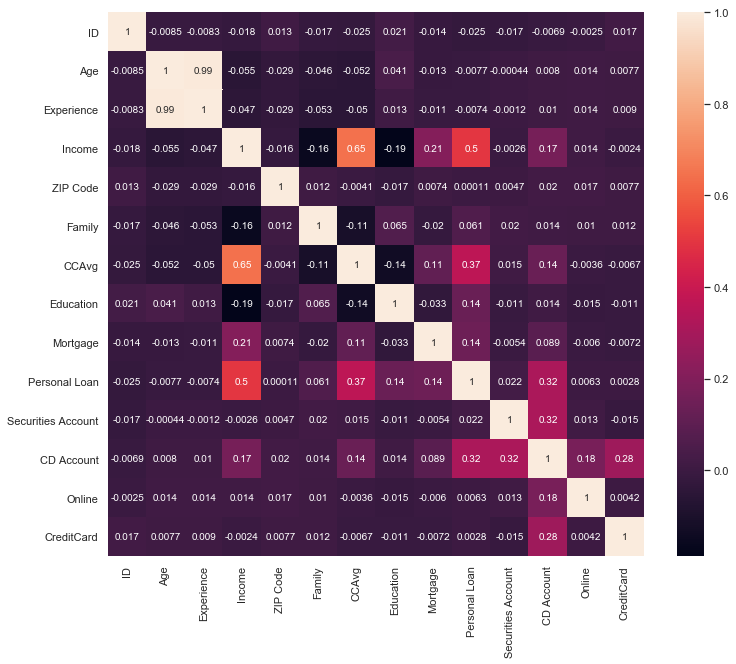

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

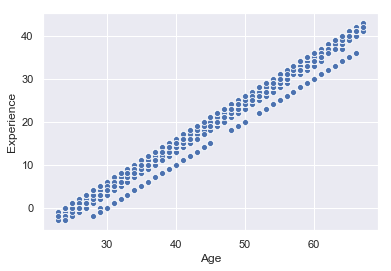

In [23]:
sns.scatterplot(x='Age',y='Experience',data=df)

Observation: Both Age and Experience are highly correlated. So considering only one feature instead of both. Otherwise impact on Target Feature(Here its Personal Loan) gets doubled.

#### Distribution of Age with respect to Personal Loan :

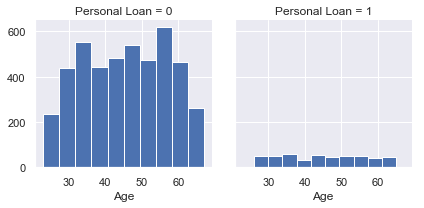

In [24]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'Age',bins=10)

In [25]:
df['Age_Band']=pd.cut(df['Age'],bins=7)
df[['Age_Band','Personal Loan']].groupby(by='Age_Band',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,Age_Band,Personal Loan
1,"(29.286, 35.571]",0.108142
6,"(60.714, 67.0]",0.107861
3,"(41.857, 48.143]",0.103292
0,"(22.956, 29.286]",0.100410
4,"(48.143, 54.429]",0.094629
5,"(54.429, 60.714]",0.080605
2,"(35.571, 41.857]",0.080332


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

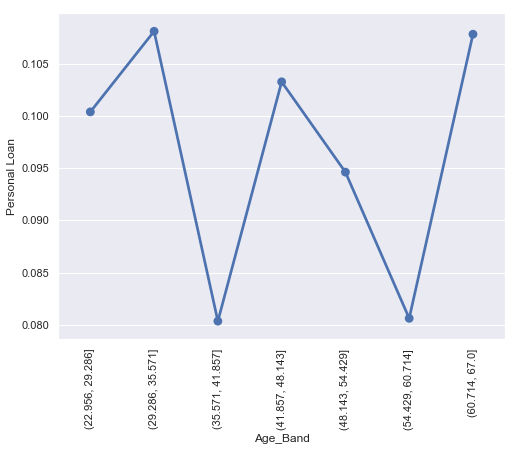

In [26]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Age_Band',y='Personal Loan',data=df[['Age_Band','Personal Loan']].groupby(by='Age_Band',as_index=False).mean().sort_values(by='Personal Loan',ascending=False))
plt.xticks(rotation=90)

Observation: Around 8 to 11% of the people from each age group took Personal loan.

#### Distribution of Income with respect to Personal Loan :

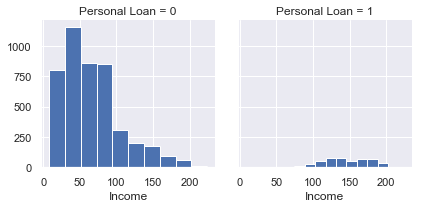

In [27]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'Income',bins=10)

In [28]:
df['Income_Band']=pd.cut(df['Income'],bins=10)
df[['Income_Band','Personal Loan']].groupby(by='Income_Band',as_index=False).mean().sort_values(by=['Personal Loan','Income_Band'],ascending=False)

,Income_Band,Personal Loan
8,"(180.8, 202.4]",0.546099
7,"(159.2, 180.8]",0.517766
6,"(137.6, 159.2]",0.350746
5,"(116.0, 137.6]",0.348534
4,"(94.4, 116.0]",0.180371
9,"(202.4, 224.0]",0.111111
3,"(72.8, 94.4]",0.029579
2,"(51.2, 72.8]",0.005767
1,"(29.6, 51.2]",0.000000
0,"(7.784, 29.6]",0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

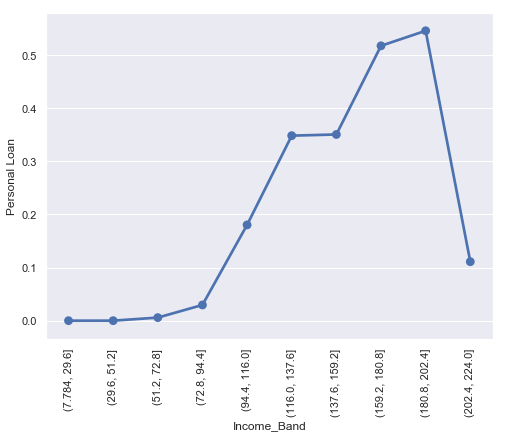

In [29]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Income_Band',y='Personal Loan',data=df[['Income_Band','Personal Loan']].groupby(by='Income_Band',as_index=False).mean())
plt.xticks(rotation=90)

Observation: Above indicates that people tend to take Personal Loan as their Income increases. However the highest Income Band people are exceptional.

#### Distribution of ZIP Code with respect to Personal Loan :

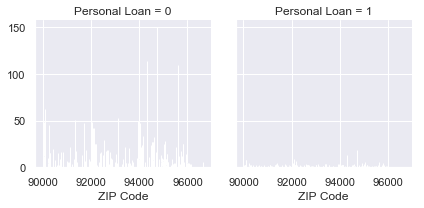

In [30]:
bins=list(range(90005,96651+1,1))
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'ZIP Code',bins=bins)

In [31]:
dfg_zip=df[['ZIP Code','Personal Loan']].groupby(by='ZIP Code').mean().sort_values(by='Personal Loan',ascending=False)[['Personal Loan']].head(10)
dfg_zip

,Personal Loan
ZIP Code,
95135,0.666667
96008,0.666667
92056,0.500000
94108,0.500000
90016,0.500000
90059,0.500000
91129,0.500000
94705,0.500000
93022,0.400000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

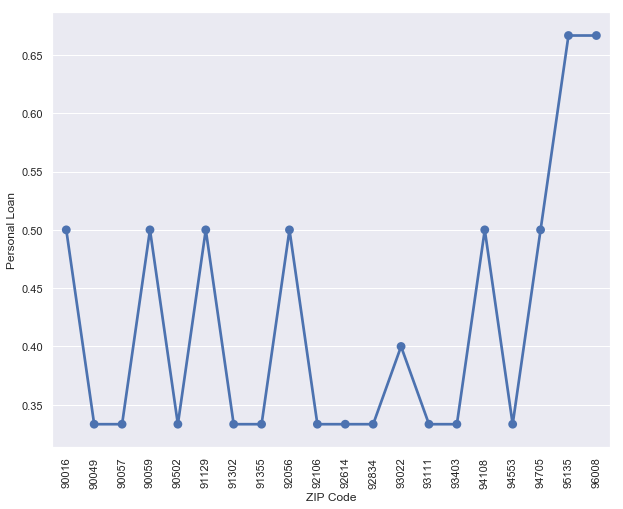

In [32]:
plt.figure(figsize=(10,8))
sns.pointplot(x='ZIP Code',y='Personal Loan',data=df[['ZIP Code','Personal Loan']].groupby(by='ZIP Code',as_index=False).mean().sort_values(by='Personal Loan',ascending=False).head(20))
plt.xticks(rotation=90)

Above indicates that there are particular location(ZIP Code) where people are willing to take Personal Loan. lets check on how many samples are being used to generate the above observation:

In [33]:
# No. of Unique values
df['ZIP Code'].nunique()

467

In [34]:
# Get the counts for each ZIP Code
dfg_zipcount=df.groupby(by='ZIP Code')[['ID']].count()
dfg_zipcount.head(5)

,ID
ZIP Code,
9307,1
90005,5
90007,6
90009,8
90011,3


In [35]:
# Join between Personal loan freq wrt ZIP Code vs ZIP code counts
dfg_zip.join(other=dfg_zipcount,how='left',lsuffix='ZIP_P')

,Personal Loan,ID
ZIP Code,,
95135,0.666667,3
96008,0.666667,3
92056,0.500000,6
94108,0.500000,4
90016,0.500000,2
90059,0.500000,4
91129,0.500000,2
94705,0.500000,4
93022,0.400000,5


Observation: As per the above the volumes supporting the relation between ZIP Code and Personal Loan is very less. Hence we can not conclude whether ZIP Code is essential or not. Need more data to conclude on this. Hence with this limitation, we can exclude this feature for building the model.

#### Distribution of Family with respect to Personal Loan:

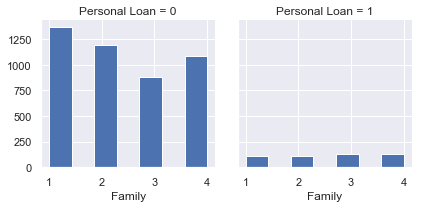

In [36]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'Family',bins=7)

In [37]:
df[['Personal Loan','Family']].groupby(by='Family',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,Family,Personal Loan
2,3,0.131683
3,4,0.109656
1,2,0.081790
0,1,0.072690


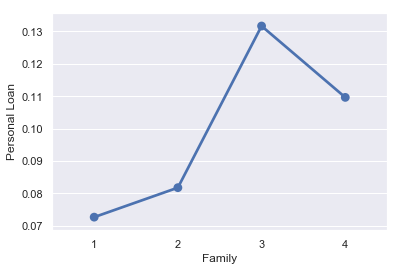

In [38]:
sns.pointplot(x='Family',y='Personal Loan',data=df[['Personal Loan','Family']].groupby(by='Family',as_index=False).mean())

Observation: Above indicates that People tend to take Personal Loan with no. of family people increases. However we can see that Family count of 4 is exceptional. Considering this feature in the model as it has predicting capability to an extent.

#### Distribution of CCAvg with respect to Personal Loan:

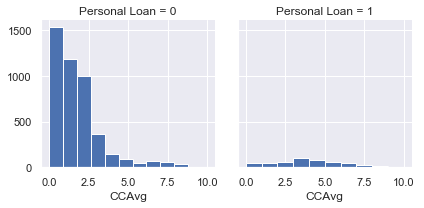

In [39]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'CCAvg',bins=10)

In [40]:
df['CCAvg_Band']=pd.cut(df['CCAvg'],bins=10)
df[['CCAvg_Band','Personal Loan']].groupby(by='CCAvg_Band',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,CCAvg_Band,Personal Loan
9,"(9.0, 10.0]",1.000000
5,"(5.0, 6.0]",0.590476
4,"(4.0, 5.0]",0.406863
6,"(6.0, 7.0]",0.358333
3,"(3.0, 4.0]",0.307692
8,"(8.0, 9.0]",0.285714
7,"(7.0, 8.0]",0.231707
2,"(2.0, 3.0]",0.078540
1,"(1.0, 2.0]",0.035259
0,"(-0.01, 1.0]",0.025601


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

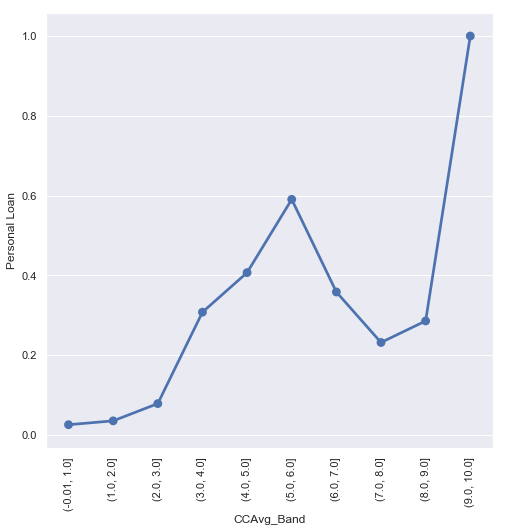

In [41]:
plt.figure(figsize=(8,8))
sns.pointplot(x='CCAvg_Band',y='Personal Loan',data=df[['CCAvg_Band','Personal Loan']].groupby(by='CCAvg_Band',as_index=False).mean())
plt.xticks(rotation=90)

Observation: Above indicates that as CCAvg increases then People tends to take Personal Loan. However after a certain range trend is down and then again it went up for the highest CCAvg Usagers.
Considering this feature as well in the model as it can help predicting to an extent.

#### Distribution of Education with respect to Personal Loan:

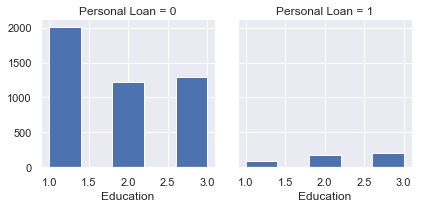

In [42]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'Education',bins=5)

In [43]:
df[['Education','Personal Loan']].groupby(by='Education',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,Education,Personal Loan
2,3,0.136576
1,2,0.129722
0,1,0.044370


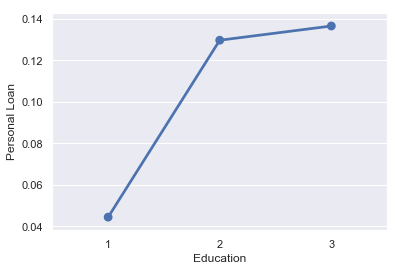

In [44]:
sns.pointplot(x='Education',y='Personal Loan',data=df[['Education','Personal Loan']].groupby(by='Education',as_index=False).mean())

Observation: Above indicates a clearly upward trend, so as years of Education increases then people tend to take Personal Loan.
Considering this feature for model

#### Distribution of Mortgage with respect to Personal Loan:

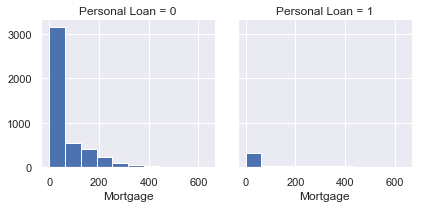

In [45]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(plt.hist,'Mortgage',bins=10)

In [46]:
df['Mortgage_Band']=pd.cut(df['Mortgage'],bins=10)

In [47]:
df[['Mortgage_Band','Personal Loan']].groupby(by='Mortgage_Band',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,Mortgage_Band,Personal Loan
9,"(571.5, 635.0]",0.800000
8,"(508.0, 571.5]",0.615385
6,"(381.0, 444.5]",0.355556
7,"(444.5, 508.0]",0.333333
5,"(317.5, 381.0]",0.324324
4,"(254.0, 317.5]",0.228346
3,"(190.5, 254.0]",0.114173
0,"(-0.635, 63.5]",0.090121
2,"(127.0, 190.5]",0.052257
1,"(63.5, 127.0]",0.043630


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

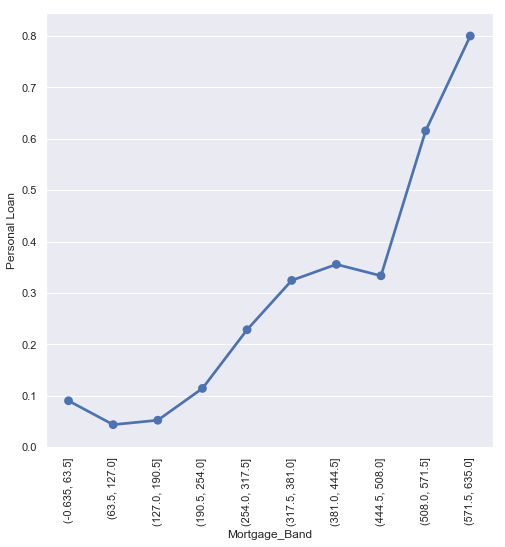

In [48]:
plt.figure(figsize=(8,8))
sns.pointplot(x='Mortgage_Band',y='Personal Loan',data=df[['Mortgage_Band','Personal Loan']].groupby(by='Mortgage_Band',as_index=False).mean())
plt.xticks(rotation=90)

Observation: Above indicates that there is a sort of upward trend, so as Mortgage Increases then people tend to take Personal Loan.
Considering this feature as well.

#### Distribution of Securities Account with respect to Personal Loan:

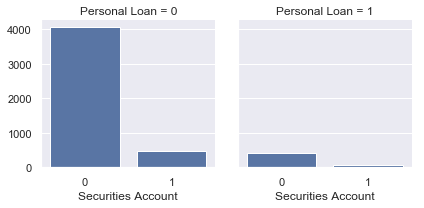

In [49]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(sns.countplot,'Securities Account',order=[0,1])

In [50]:
df[['Securities Account','Personal Loan']].groupby(by='Securities Account',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,Securities Account,Personal Loan
1,1,0.114943
0,0,0.093792


Observation: Seems People who are having Securities Account tend to take Personal Loan. However there is only 2% difference between them.
As of now, keeping this feature as there is uncertainity.

#### Distribution of CD Account with respect to Personal Loan:

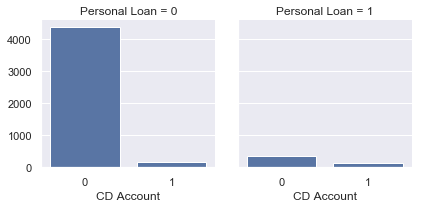

In [51]:
g=sns.FacetGrid(df,col='Personal Loan')
g.map(sns.countplot,'CD Account',order=[0,1])

In [52]:
df[['CD Account','Personal Loan']].groupby(by='CD Account',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,CD Account,Personal Loan
1,1,0.463576
0,0,0.072371


Observation: Above indicates that People who are having CD Account tend to take Personal Loan compared to not having.
Considering this feature for the model.

#### Distribution of Online with respect to Personal Loan:

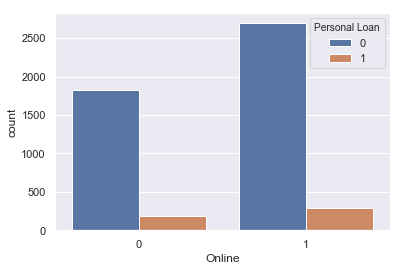

In [53]:
sns.countplot(x='Online',hue='Personal Loan',data=df)

In [54]:
df[['Online','Personal Loan']].groupby(by='Online',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,Online,Personal Loan
1,1,0.09752
0,0,0.09375


Observation: Above indicates that having Online hasn't been much impact in taking Personal loan. Hence this can be avoided while building the model. Lets keep it for now, because we dont know how this percentages can vary if we include any other feature in this analysis.

#### Distribution of CreditCard with respect to Personal Loan:

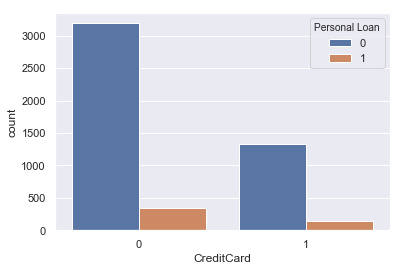

In [55]:
sns.countplot(x='CreditCard',hue='Personal Loan',data=df)

In [56]:
df[['CreditCard','Personal Loan']].groupby(by='CreditCard',as_index=False).mean().sort_values(by='Personal Loan',ascending=False)

,CreditCard,Personal Loan
1,1,0.097279
0,0,0.095467


Observation: Above indicates that having CreditCard hasn't been much impact in taking Personal loan. Hence this can be avoided while building the model. Lets keep it for now, because we dont know how this percentages can vary if we include any other feature in this analysis.

# 4. Split the data into training and test set in the ratio of 70:30 respectively 
(5 marks)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=df.drop(['ID','Experience','ZIP Code','Personal Loan','Age_Band','Income_Band','CCAvg_Band','Mortgage_Band'],axis=1)
y=df['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)

### Logistic Regression model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
log_model=LogisticRegression(solver='lbfgs',max_iter=1100)
log_model=log_model.fit(x_train,y_train)

In [61]:
log_y_train_pred=log_model.predict(x_train)
accuracy_score(y_train,log_y_train_pred)

0.9494285714285714

In [62]:
log_y_test_pred=log_model.predict(x_test)
accuracy_score(y_test,log_y_test_pred)

0.9533333333333334

### KNN Classifier model

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [64]:
mm_scale=MinMaxScaler()
mm_scale=mm_scale.fit(X)
x_train_scaled=pd.DataFrame(data=mm_scale.transform(x_train), columns=X.columns)
x_test_scaled=pd.DataFrame(data=mm_scale.transform(x_test), columns=X.columns)

In [65]:
# Choose right k-value
accuracy_list=[]
for k in range(1,50):  
    knn_model=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn_model=knn_model.fit(x_train_scaled,y_train)
    knn_y_test_pred=knn_model.predict(x_test_scaled)
    accuracy_list.append(accuracy_score(y_test,knn_y_test_pred))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

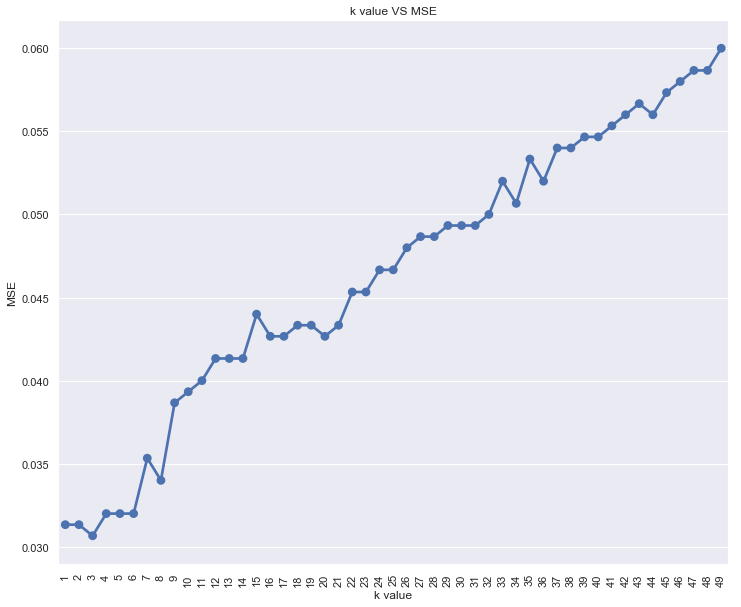

In [66]:
mse=[1-x for x in accuracy_list]
plt.figure(figsize=(12,10))
sns.pointplot(x=list(range(1,50)),y=mse)
plt.xlabel('k value')
plt.ylabel('MSE')
plt.title('k value VS MSE')
plt.xticks(rotation=90)

Observation: Above indicates the k value of 3 gives better results. So choosing k=3 for this model

In [67]:
# Build model
k=3
knn_model=KNeighborsClassifier(n_neighbors=k,weights='distance')
knn_model=knn_model.fit(x_train_scaled,y_train)
knn_y_test_pred=knn_model.predict(x_test_scaled)


In [68]:
print("Accuracy score for test data for k=3 is: ", accuracy_score(y_test,knn_y_test_pred))

Accuracy score for test data for k=3 is:  0.9693333333333334


### Naive Bayes Classifier model

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)
gnb_y_test_pred=nb_model.predict(x_test)
accuracy_score(y_test,gnb_y_test_pred)
#accuracy_score(y_train,nb_model.predict(x_train))

0.886

# 6. Print the confusion matrix for all the above models (5 marks)

### Logistic Regression model:

In [71]:
cm=confusion_matrix(y_test,log_y_test_pred,labels=[1,0])
cm_df=pd.DataFrame(data=cm,index=['Actual Personal Loan 1','Actual Personal Loan 0'],columns=['Predict Personal Loan 1','Predict Personal Loan 0'])
cm_df

,Predict Personal Loan 1,Predict Personal Loan 0
Actual Personal Loan 1,77,51
Actual Personal Loan 0,19,1353


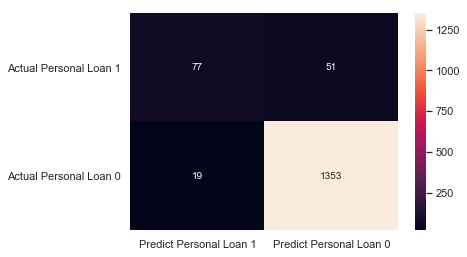

In [72]:
sns.heatmap(cm_df,annot=True,fmt='g')

In [73]:
print(classification_report(y_test,log_y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.80      0.60      0.69       128

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.88      0.79      0.83      1500
weighted avg       0.95      0.95      0.95      1500



### KNN Classifier model:

In [74]:
cm=confusion_matrix(y_test,knn_y_test_pred,labels=[1,0])
cm_df=pd.DataFrame(data=cm,index=['Actual Personal Loan 1','Actual Personal Loan 0'],columns=['Predict Personal Loan 1','Predict Personal Loan 0'])
cm_df

,Predict Personal Loan 1,Predict Personal Loan 0
Actual Personal Loan 1,94,34
Actual Personal Loan 0,12,1360


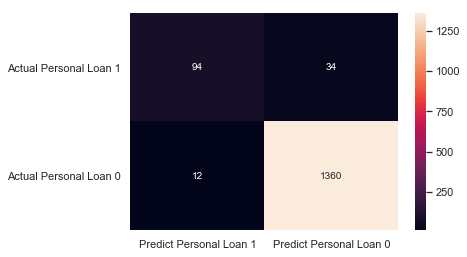

In [75]:
sns.heatmap(cm_df,annot=True,fmt='g')

In [76]:
print(classification_report(y_test,knn_y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       0.89      0.73      0.80       128

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.93      0.86      0.89      1500
weighted avg       0.97      0.97      0.97      1500



### Naive Bayes Classifier model:

In [77]:
cm=confusion_matrix(y_test,gnb_y_test_pred,labels=[1,0])
cm_df=pd.DataFrame(data=cm,index=['Actual Personal Loan 1','Actual Personal Loan 0'],columns=['Predict Personal Loan 1','Predict Personal Loan 0'])
cm_df

,Predict Personal Loan 1,Predict Personal Loan 0
Actual Personal Loan 1,75,53
Actual Personal Loan 0,118,1254


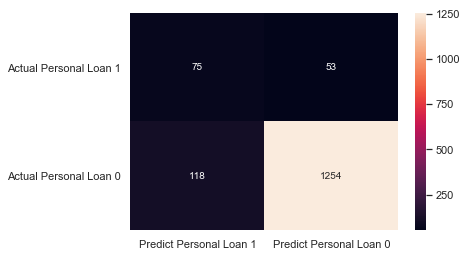

In [78]:
sns.heatmap(cm_df,annot=True,fmt='g')

In [79]:
print(classification_report(y_test,gnb_y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.59      0.47       128

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500



# 7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

Since the agenda here is to identify the People whom we can target for Personal Loan. There are two things here:
1. Model predicting people are not willing to take personal loan but actually they are willing to take. These can be called as    False Negatives. If False Negatives are more then Bank will miss these customers in recommending Personal Loan. 
2. Model predicting people wrongly as they are willing to take personal loan but actually they are not. These can be called as    False Positives. If False Positives are more then the efforts of Bank in recommending Personal Loan to the customers is        wasted.

By looking at above cases in this scenario, I feel the model which gives less count of False Negatives should be considered and also False Positives should be less if possible. So priority is for False Negatives and then next is for False Positives.

By looking at confusion matrix and classification report, I can see that f-score of KNN model is better than Logistic and Naive Bayes. Also, recall is also more for KNN model. The same goes for precision as well.

Conclusion: KNN is the best model in this case.

#### Why KNN Performed Better?

Logistic Regression: Its a linear classifier. By looking at Multivariate Analysis and correlation heatmaps, that the Independent Features are not having very good correlation with Target Feature. Hence linear classifier may not be of much helpful in this case.

KNN: KNN is a pretty straight forward non-parametric model and is a non-linear classifier as well. Issue with KNN is the computation power and the memory to keep note of all the data points in the space. KNN works well for large no. of features only if there is sufficient large enough data. Though in this case we dont have large data but the model does pretty well.

Naive Bayes: For this use case, Gaussian NB model has to be used because there are continuous variables in the dataset. This model has an assumption that all the Independent features follow Gaussian distribution. By looking the Multivariate analysis - Facetgrid graphs for Personal loan 1 & 0 , it clearly indicates that most of the features didnt follow Gaussian distribution. Hence using this model may not be fruitful.
